# Embedding Error Analysis
Using the PCA data generated by the previous script, this script calculated the Embedding Error using the Wasserstein Metric to measure deviation in the constructs with reference to the WT.

Modified by Sean Stetson on November 1, 2024.

In [1]:
#Edit these to suit your system:
NUM_RESIDUES = 194
comparisons = ["Y220C", "Y220C_PK11000", "WT_PK11000"]
colorDic = {"Y220C": "#ff1c1c", "Y220C_PK11000": "#45bf1d", "WT_PK11000": "#ffc400"}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
from collections import OrderedDict
from matplotlib.lines import Line2D

plt.rcParams['font.family'] = 'Helvetica'

In [3]:
def ComputeNumPCs(refDF):
    NUM_PCS = 0
    while str(NUM_PCS) in refDF:
        NUM_PCS += 1
    return NUM_PCS

In [4]:
def get_var2(dataframe1, dataframe2, NUM_PCs, NUM_RESIDUES):
    divergences = []
    for i in range(NUM_RESIDUES):

        data1 = [[] for _ in range(NUM_PCs)]
        data2 = [[] for _ in range(NUM_PCs)]


        for index, row in dataframe1[dataframe1["res"] == i + 1].iterrows():
            for j in range(NUM_PCs):
                data1[j].append(row[j])


        for index, row in dataframe2[dataframe2["res"] == i + 1].iterrows():
            for j in range(NUM_PCs):
                data2[j].append(row[j])


        divergence_sum = sum(wasserstein_distance(data1[j], data2[j]) for j in range(NUM_PCs))
        divergences.append(divergence_sum)

    return divergences


In [5]:
def PlotEE(values, title, picName):
    topTen = values.sort_values(by=values.columns[0], ascending=False)[:10]

    fig, ax = plt.subplots(figsize = (8, 6))
    ax.set_title(title, fontsize = 25)

    ax.plot(range(len(values)), values, "-")
    ax.plot(topTen, ".", markersize = 10)
    
    ax.set_xticks([int(x) for x in np.linspace(1, NUM_RESIDUES, 10, endpoint = True)])
    ax.tick_params(axis = 'x', which = 'major')
    ax.tick_params(axis = 'x', which = 'major')
    
    ax.set_xbound(1, NUM_RESIDUES)
    ax.set_xlabel('Residue Number', fontsize = 15)
    ax.set_ylabel('Embedding Error', fontsize = 15)
    
    line = Line2D([0], [0], label = 'EE Value', color = '#1f77b4')
    point = Line2D([0], [0], label = 'Top Ten', marker = '.', markersize = 10, 
             markeredgecolor = '#ff7f0e', markerfacecolor = '#ff7f0e', linestyle = '')
    plt.legend(handles = [line, point], borderaxespad = 0, bbox_to_anchor = (0.5, -0.15), 
               loc = "upper center", ncols = 4, edgecolor = "white", framealpha = 0)
    
    #fig.savefig(picName, bbox_inches = "tight", dpi = 500)

    return topTen
    
def PlotManyEE(values, colors, labels, title, picName):
    fig, ax = plt.subplots(1, 1, figsize = (15, 6))
    ax.set_title(title, fontsize = 25)

    for value, color, label in zip(values, colors, labels):
        ax.plot(range(96, 96 + NUM_RESIDUES), value, "-", label = label, color = color)

        value_sorted = value.copy()
        value_sorted.sort_values(inplace = True, ascending = False)
        ax.plot([x + 96 for x in value_sorted[0:10].index], value_sorted[0:10].values, ".", markersize = 15, color = color)

    ax.set_xticks([int(x) for x in np.linspace(96, 96 + NUM_RESIDUES - 1, 10, endpoint = True)])
    ax.tick_params(axis = 'x', which = 'major')
    ax.tick_params(axis = 'x', which = 'major')

    ax.set_xbound(96, 96 + NUM_RESIDUES - 1)
    ax.set_xlabel('Residue Number', fontsize = 15)
    ax.set_ylabel('Embedding Error', fontsize = 15)
    
    fig.legend(borderaxespad = 0, bbox_to_anchor = (0.5, 0), loc = "upper center", ncols = 3, edgecolor = "white", framealpha = 0)
    
    #fig.savefig(picName, bbox_inches = "tight", dpi = 500, transparent = False, facecolor = "white")

In [6]:
#Import the Heat Kernels for each system to be used in pairwise wasserstein analysis
pcs = {
    "WT": pd.read_csv("/home/student5/Desktop/Energetics/Processed/DBD_005/DBD_WT_Long+Short_Elec_1-194.csv"),
    "WT_PK11000": pd.read_csv("/home/student5/Desktop/Energetics/Processed/DBD_005/DBD_WT_PK11000_Long+Short_Elec_1-194.csv"),
    "Y220C": pd.read_csv("/home/student5/Desktop/Energetics/Processed/DBD_005/DBD_Y220C_Long+Short_Elec_1-194.csv"),
    "Y220C_PK11000": pd.read_csv("/home/student5/Desktop/Energetics/Processed/DBD_005/DBD_Y220C_PK11000_Long+Short_Elec_1-194.csv")
}
pcs["WT"]

,0,1,2,3,heat,res,frame
0,-0.009291,0.001629,0.003855,0.005597,0.011052,1,0
1,-0.008700,0.001261,0.003955,0.006252,0.011235,2,0
2,-0.008960,0.002615,0.003429,0.005988,0.011162,3,0
3,-0.007279,0.003887,0.001675,0.006177,0.011365,4,0
4,0.014424,0.002625,-0.001279,0.005423,0.014194,5,0
...,...,...,...,...,...,...,...
775995,0.001169,-0.009884,0.008678,-0.002327,0.013171,190,3999
775996,-0.001920,-0.007035,0.010798,-0.001343,0.012903,191,3999
775997,-0.009134,-0.007936,0.008822,-0.001636,0.011825,192,3999
775998,-0.001089,-0.008708,0.008416,-0.002799,0.012791,193,3999


In [7]:
NUM_PCs = ComputeNumPCs(pcs["WT"])
NUM_PCs

4

            0
0    0.009295
1    0.008783
2    0.007943
3    0.007096
4    0.005823
..        ...
189  0.003055
190  0.002386
191  0.002143
192  0.003081
193  0.003429

[194 rows x 1 columns]


,0
124,0.020400
128,0.009657
0,0.009295
1,0.008783
2,0.007943
5,0.007464
129,0.007167
3,0.007096
88,0.006687
69,0.006558


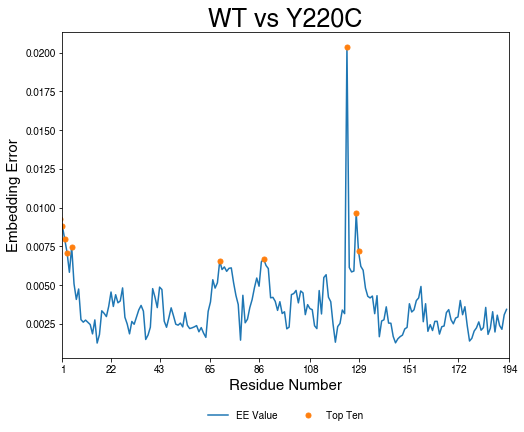

In [8]:
y220c_EE = pd.DataFrame(get_var2(pcs["WT"], pcs["Y220C"], NUM_PCs, NUM_RESIDUES))

print(y220c_EE)

y220c_TopTen = PlotEE(y220c_EE, "WT vs Y220C", "")
y220c_TopTen

,0
124,0.020074
5,0.011413
90,0.010879
3,0.010639
4,0.010365
1,0.009918
2,0.009819
0,0.009806
88,0.009053
8,0.008848


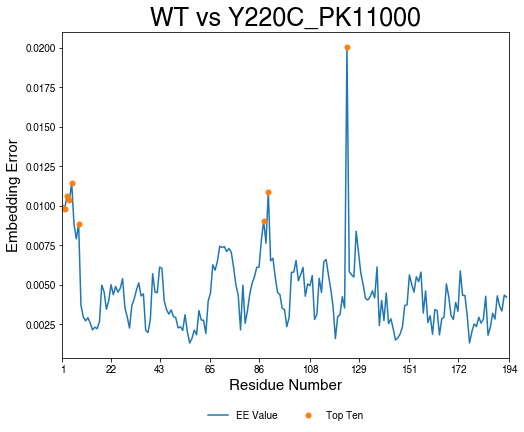

In [9]:
y220c_PK11000_EE = pd.DataFrame(get_var2(pcs["WT"], pcs["Y220C_PK11000"], NUM_PCs, NUM_RESIDUES))

y220c_PK11000_TopTen = PlotEE(y220c_PK11000_EE, "WT vs Y220C_PK11000", "")
y220c_PK11000_TopTen

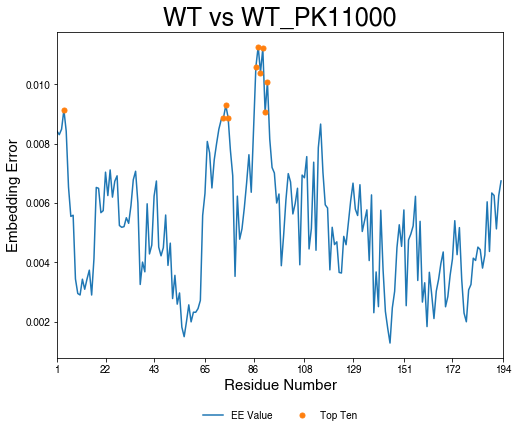

In [10]:
wt_PK11000_EE = pd.DataFrame(get_var2(pcs["WT"], pcs["WT_PK11000"], NUM_PCs, NUM_RESIDUES))

wt_PK11000_TopTen = PlotEE(wt_PK11000_EE, "WT vs WT_PK11000", "")

In [11]:
eeValues = pd.DataFrame([wt_PK11000_EE.iloc[:, 0], y220c_EE.iloc[:, 0], y220c_PK11000_EE.iloc[:, 0]], index=["WT_PK11000", "Y220C", "Y220C_PK11000"]).T
eeValues.mean()

WT_PK11000       0.005260
Y220C            0.003655
Y220C_PK11000    0.004481
dtype: float64

# Pairwise Embedding Error Analysis

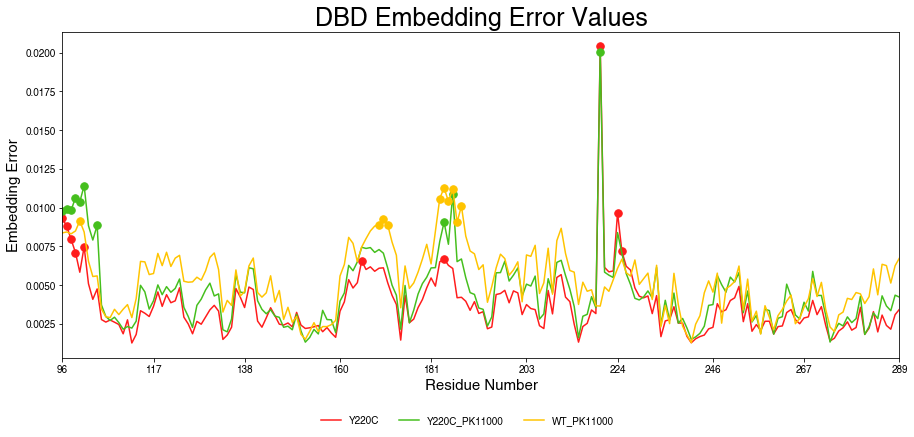

In [13]:
# Plot of ALL Embedding Error Values from Pairwise System Comparisons
PlotManyEE([eeValues['Y220C'], eeValues['Y220C_PK11000'], eeValues['WT_PK11000']], ["#ff1c1c", "#45bf1d", "#ffc400"], 
           ["Y220C", "Y220C_PK11000", "WT_PK11000"], 
           "DBD Embedding Error Values", "/home/student5/Desktop/DBD_EE_003_2.png")

In [14]:
def PlotDifference(series1: pd.Series, series2: pd.Series, title: str, figName: str):
    fig, ax = plt.subplots(figsize = (15, 6))

    diff = series1 - series2

    ax.hlines(0, 96, 96 + NUM_RESIDUES, color = "red", linestyles = "-.", zorder=-1)
    ax.plot(range(96, 96 + NUM_RESIDUES), diff, color = "royalblue", lw=2)
    topVals = diff.sort_values()[:15]
    ax.scatter(x = [x + 96 for x in topVals.index], y = topVals.values, color = "royalblue")

    ax.set_xlim(96, 96 + NUM_RESIDUES - 1)
    ax.set_xticks([int(x) for x in np.linspace(96, 96 + NUM_RESIDUES - 1, 10, endpoint = True)])

    ax.set_xlabel("Residue Number")
    ax.set_ylabel("Embedding Error Value")

    fig.suptitle(title, fontsize = 25)

    fig.savefig(figName, bbox_inches = "tight", dpi = 500, transparent = False, facecolor = "white")
    
    return diff.sort_values()[:15]

/tmp/ipykernel_663526/2068373739.py:19: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.savefig(figName, bbox_inches = "tight", dpi = 500, transparent = False, facecolor = "white")


128   -0.001274
131   -0.000934
56    -0.000882
132   -0.000671
57    -0.000628
59    -0.000542
130   -0.000473
15    -0.000433
127   -0.000421
55    -0.000372
124   -0.000326
125   -0.000306
133   -0.000244
126   -0.000212
52    -0.000205
dtype: float64

/home/student5/anaconda3/envs/AmberTools23/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/student5/anaconda3/envs/AmberTools23/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


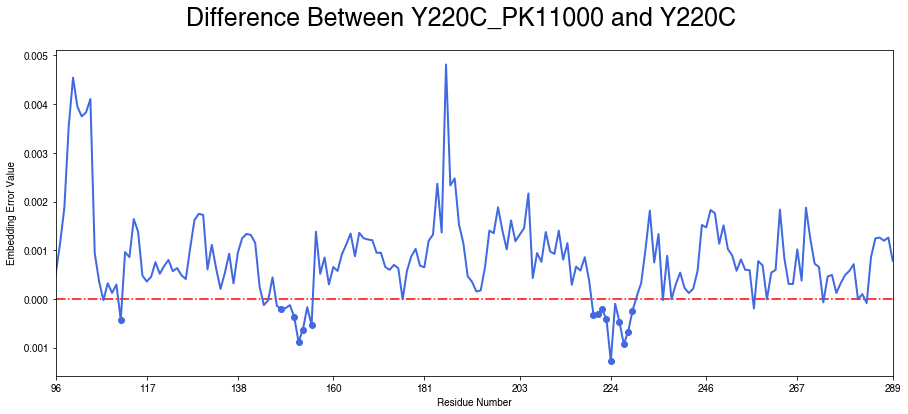

In [15]:
PlotDifference(eeValues['Y220C_PK11000'], eeValues['Y220C'], "Difference Between Y220C_PK11000 and Y220C", "/home/student5/Desktop/DBD_EE_Diff_003.png")

In [16]:
eeValues_Maxes = eeValues.set_axis(['WT_PK11000', 'Y220C', 'Y220C_PK11000'], axis = 1)
eeValues_Maxes["Maxes"] = pd.DataFrame(eeValues_Maxes[:].idxmax(1))
eeValues_Maxes

,WT_PK11000,Y220C,Y220C_PK11000,Maxes
0,0.008364,0.009295,0.009806,Y220C_PK11000
1,0.008423,0.008783,0.009918,Y220C_PK11000
2,0.008301,0.007943,0.009819,Y220C_PK11000
3,0.008486,0.007096,0.010639,Y220C_PK11000
4,0.009137,0.005823,0.010365,Y220C_PK11000
...,...,...,...,...
189,0.006335,0.003055,0.004298,WT_PK11000
190,0.006251,0.002386,0.003645,WT_PK11000
191,0.005124,0.002143,0.003338,WT_PK11000
192,0.006244,0.003081,0.004341,WT_PK11000


In [17]:
#assign max EE to each residue from all pairwise combs
eeValues_Max = pd.DataFrame(eeValues_Maxes.iloc[:, 0:3].max(axis = 1))
eeValues_Max['Maxes'] = eeValues_Maxes['Maxes']
eeValues_Max

,0,Maxes
0,0.009806,Y220C_PK11000
1,0.009918,Y220C_PK11000
2,0.009819,Y220C_PK11000
3,0.010639,Y220C_PK11000
4,0.010365,Y220C_PK11000
...,...,...
189,0.006335,WT_PK11000
190,0.006251,WT_PK11000
191,0.005124,WT_PK11000
192,0.006244,WT_PK11000


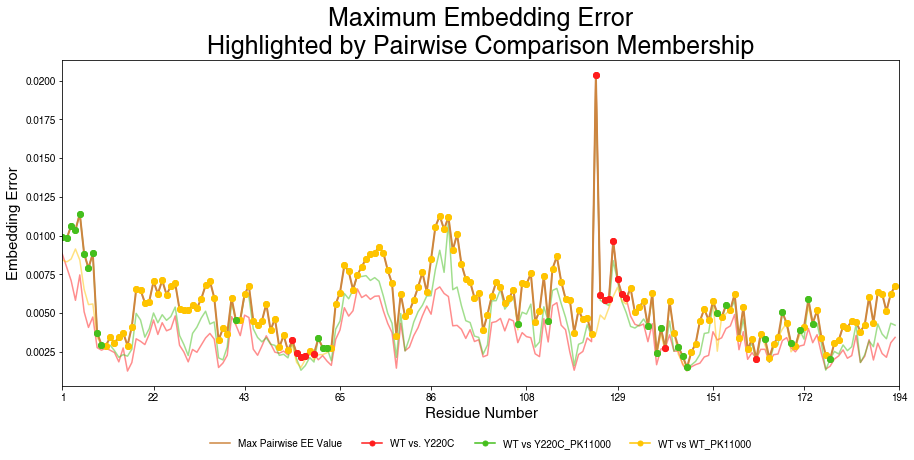

In [18]:
fig, ax = plt.subplots(figsize = (15, 6))


ax.plot(eeValues['Y220C'], color = colorDic["Y220C"], alpha = 0.5)
ax.plot(eeValues['Y220C_PK11000'], color = colorDic["Y220C_PK11000"], alpha = 0.5)
ax.plot(eeValues['WT_PK11000'], color = colorDic["WT_PK11000"], alpha = 0.5)

ax.plot(eeValues_Max[0], marker = 'o', linestyle = '-', markersize = 2, color = "peru", linewidth = 2)

for name, group in eeValues_Max.groupby("Maxes"):
    for index, value in zip(group[0].keys().tolist(), group[0].tolist()):
        plt.plot([index, index], [value, value], marker = 'o', color = colorDic[name], label = name)

ax.set_xticks([int(x) for x in np.linspace(1, NUM_RESIDUES, 10, endpoint = True)])
ax.set_xbound(1, NUM_RESIDUES)

ax.set_xlabel('Residue Number', fontsize = 15)
ax.set_ylabel('Embedding Error', fontsize = 15)
ax.set_title(f'Maximum Embedding Error\nHighlighted by Pairwise Comparison Membership', fontsize = 25)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

line = Line2D([0], [0], label = 'Max Pairwise EE Value', color = 'peru')
y220cPoint = Line2D([0], [0], label = 'WT vs. Y220C', marker = '.', markersize = 10, color = colorDic["Y220C"],
         markeredgecolor = colorDic["Y220C"], markerfacecolor = colorDic["Y220C"], linestyle = '-')
y220cPK_Point = Line2D([0], [0], label = 'WT vs Y220C_PK11000', marker = '.', markersize = 10, color = colorDic["Y220C_PK11000"],
         markeredgecolor = colorDic["Y220C_PK11000"], markerfacecolor = colorDic["Y220C_PK11000"], linestyle = '-')
wtPK_Point = Line2D([0], [0], label = 'WT vs WT_PK11000', marker = '.', markersize = 10, color = colorDic['WT_PK11000'],
         markeredgecolor = colorDic['WT_PK11000'], markerfacecolor = colorDic['WT_PK11000'], linestyle = '-')
plt.legend(handles = [line, y220cPoint, y220cPK_Point, wtPK_Point], borderaxespad = 0, bbox_to_anchor = (0.5, -0.15),
           loc = "upper center", ncols = 4, edgecolor = "white", framealpha = 0)

fig.savefig(f"/home/student5/Desktop/DBD_EE_Max_003.png", bbox_inches = "tight", dpi = 500, transparent = False, facecolor = "white")

In [19]:
percentages = {}
for name, group in eeValues_Max.groupby("Maxes"):
    percentages |= {name: int(10000*group.shape[0]/NUM_RESIDUES)/100}
percentages

{'WT_PK11000': 75.77, 'Y220C': 7.73, 'Y220C_PK11000': 16.49}

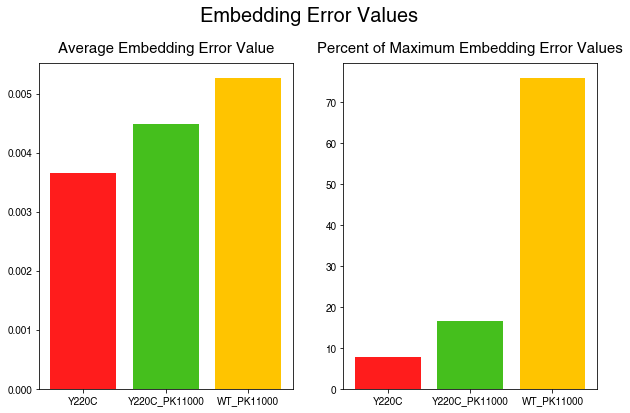

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))

ax1.bar(comparisons, 
        [eeValues[x].mean() for x in comparisons],
        color = [colorDic[x] for x in comparisons])
ax2.bar(comparisons, 
        [percentages[x] for x in comparisons],
        color = [colorDic[x] for x in comparisons])

ax1.set_title("Average Embedding Error Value", fontsize = 15, pad = 10)
ax2.set_title("Percent of Maximum Embedding Error Values", fontsize = 15, pad = 10)
fig.suptitle(f"Embedding Error Values", fontsize = 20, y = 1.01)
fig.savefig(f"/home/student5/Desktop/DBD_EE_Summary_003.png", bbox_inches = "tight", dpi = 500, transparent = False, facecolor = "white")